In [4]:
from Crypto.Hash import SHA256


hashed_input = SHA256.new(input("Enter the string to hash: ").encode()).hexdigest()
hashed_input

'ca978112ca1bbdcafac231b39a23dc4da786eff8147c4e72b9807785afee48bb'

In [5]:
string1 = "abcd"
string2 = "abce"
hashed_string1 = SHA256.new(string1.encode()).hexdigest()
hashed_string2 = SHA256.new(string2.encode()).hexdigest()
print(hashed_string1)
print(hashed_string2)

88d4266fd4e6338d13b845fcf289579d209c897823b9217da3e161936f031589
84e73dc50f2be9000ab2a87f8026c1f45e1fec954af502e9904031645b190d4f


In [32]:
from time import time
from nltk.corpus import words

lines = words.words()
full_hashes = [SHA256.new(line.strip().encode()).hexdigest() for line in lines]
times = []

for i in range(8, 51, 2):
    hashes = set()
    collision_found = False
    start = time()
    for count, hashed_line in enumerate(full_hashes):
        for j in range(len(hashed_line) - i - 1):
            substring = hashed_line[j:j + i]
            if substring in hashes:
                collision_found = True
                break
            hashes.add(substring)
        if collision_found:
            end = time()
            break
    times.append((count, i, end - start))
    if not collision_found:
        print(f"No collision length {i}")
        break
times

[(2170, 8, 0.06392478942871094),
 (27203, 10, 1.2711834907531738),
 (235886, 12, 10.305588245391846),
 (235886, 14, 7.979052782058716),
 (235886, 16, 7.81441068649292),
 (235886, 18, 9.598306655883789),
 (235886, 20, 8.542585372924805),
 (235886, 22, 7.1660425662994385),
 (235886, 24, 5.672069549560547),
 (235886, 26, 6.221262216567993),
 (235886, 28, 6.317939519882202),
 (235886, 30, 6.517982721328735),
 (235886, 32, 5.655442953109741),
 (235886, 34, 5.010921955108643),
 (235886, 36, 4.0943217277526855),
 (235886, 38, 4.237437963485718),
 (235886, 40, 5.133022785186768),
 (235886, 42, 3.798596143722534),
 (235886, 44, 3.633232831954956),
 (235886, 46, 3.0806307792663574),
 (235886, 48, 2.862916946411133),
 (235886, 50, 2.2633891105651855)]

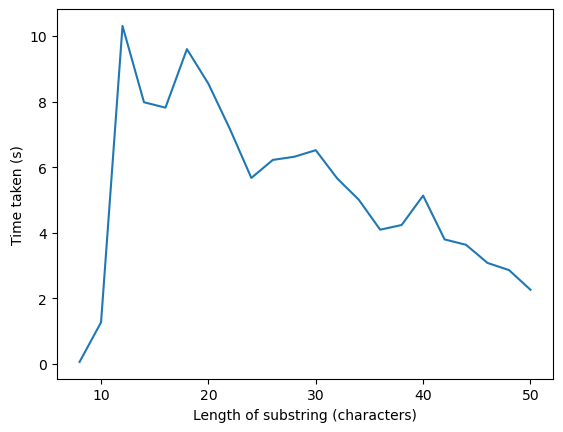

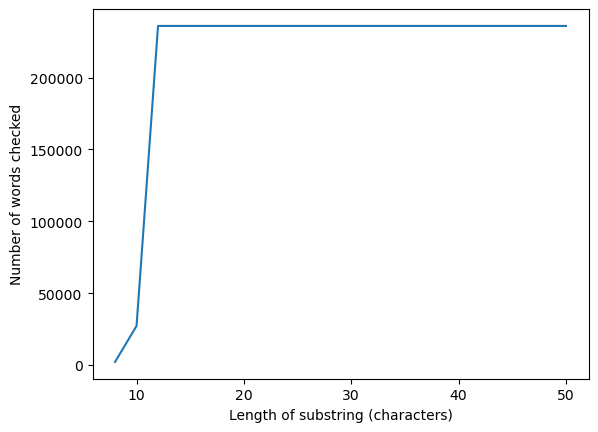

In [34]:
import matplotlib.pyplot as plt

plt.plot([time[1] for time in times], [time[2] for time in times])
plt.xlabel("Length of substring (characters)")
plt.ylabel("Time taken (s)")
plt.show()

plt.plot([time[1] for time in times], [time[0] for time in times])
plt.xlabel("Length of substring (characters)")
plt.ylabel("Number of words checked")
plt.show()